In [66]:
from sklearn.datasets import load_digits
digits = load_digits()

In [67]:
digits.data.shape

(1797, 64)

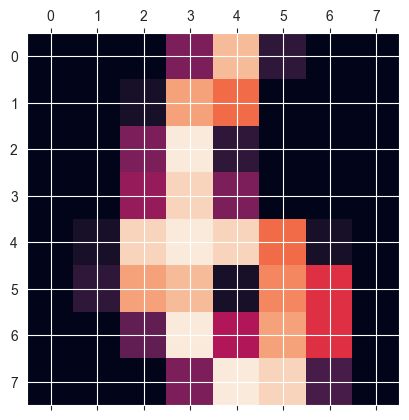

In [68]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[34])
plt.show()

In [69]:
digits.target[34]

np.int64(6)

## PCA

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_digits = pca.fit_transform(digits.data)

In [71]:
new_digits.shape

(1797, 2)

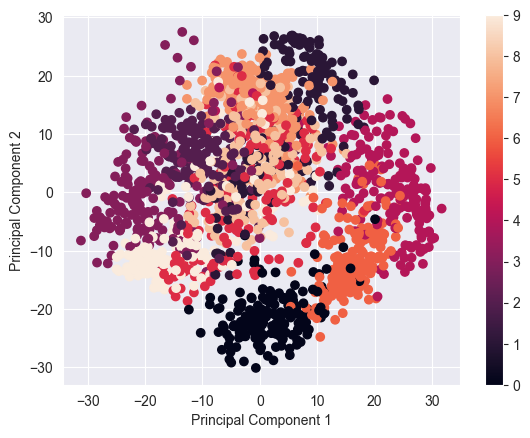

In [72]:
import matplotlib.pyplot as plt
plt.scatter(new_digits[:, 0], new_digits[:, 1], c=digits.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# PCA for speedup models

In [73]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_data = sc.fit_transform(digits.data)

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

new_data_pca = pca.fit_transform(new_data)
new_data_pca.shape

(1797, 10)

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_data, digits.target, test_size=0.2, random_state=42)

In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)

import time
start = time.time()
model.fit(x_train, y_train)
end = time.time()
print("Time without PCA:", (end - start)*1000, "ms")

Time without PCA: 41.88060760498047 ms


In [78]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy without PCA:", accuracy)

Accuracy without PCA: 0.9722222222222222


## with PCA

In [79]:
from sklearn.model_selection import train_test_split
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(new_data_pca, digits.target, test_size=0.2, random_state=42)

In [80]:
from sklearn.linear_model import LogisticRegression
model_pca = LogisticRegression(solver='lbfgs', max_iter=1000)

import time
start = time.time()
model_pca.fit(x_train_pca, y_train_pca)
end = time.time()
print("Time with PCA:", (end - start)*1000, "ms")

Time with PCA: 68.02797317504883 ms


In [81]:
from sklearn.metrics import accuracy_score
y_pred_pca = model_pca.predict(x_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print("Accuracy with PCA:", accuracy_pca)

Accuracy with PCA: 0.8972222222222223
